## Libraries

In [109]:
import pandas as pd
import numpy as np
import os
import shutil
import gdown
import glob

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import IPython
from IPython.display import Image, display

In [51]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.5/107.7 GB disk)


## Check compute

In [52]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [53]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


## Model Training

### Config and run YOLO 11

In [102]:
# Change directory
os.chdir('/content/drive/MyDrive/projects/Face-Mask-Detection/data')

In [49]:
# Config YOLO 11
!yolo task=detect mode=train \
      model=yolo11n.yaml \
      data=data_config.yaml \
      epochs=1 \
      batch=32 \
      imgsz=640 \
      plots=True

### Training Results

In [133]:
base_dir = 'runs/detect'
run_name = "train_yolo11_epoch1_v1"

run_path = os.path.join(base_dir, run_name)

#### Output Files

In [82]:
!ls {run_path}

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1732504581.a5b55abdad1e.4106.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


#### Confusion Matrix

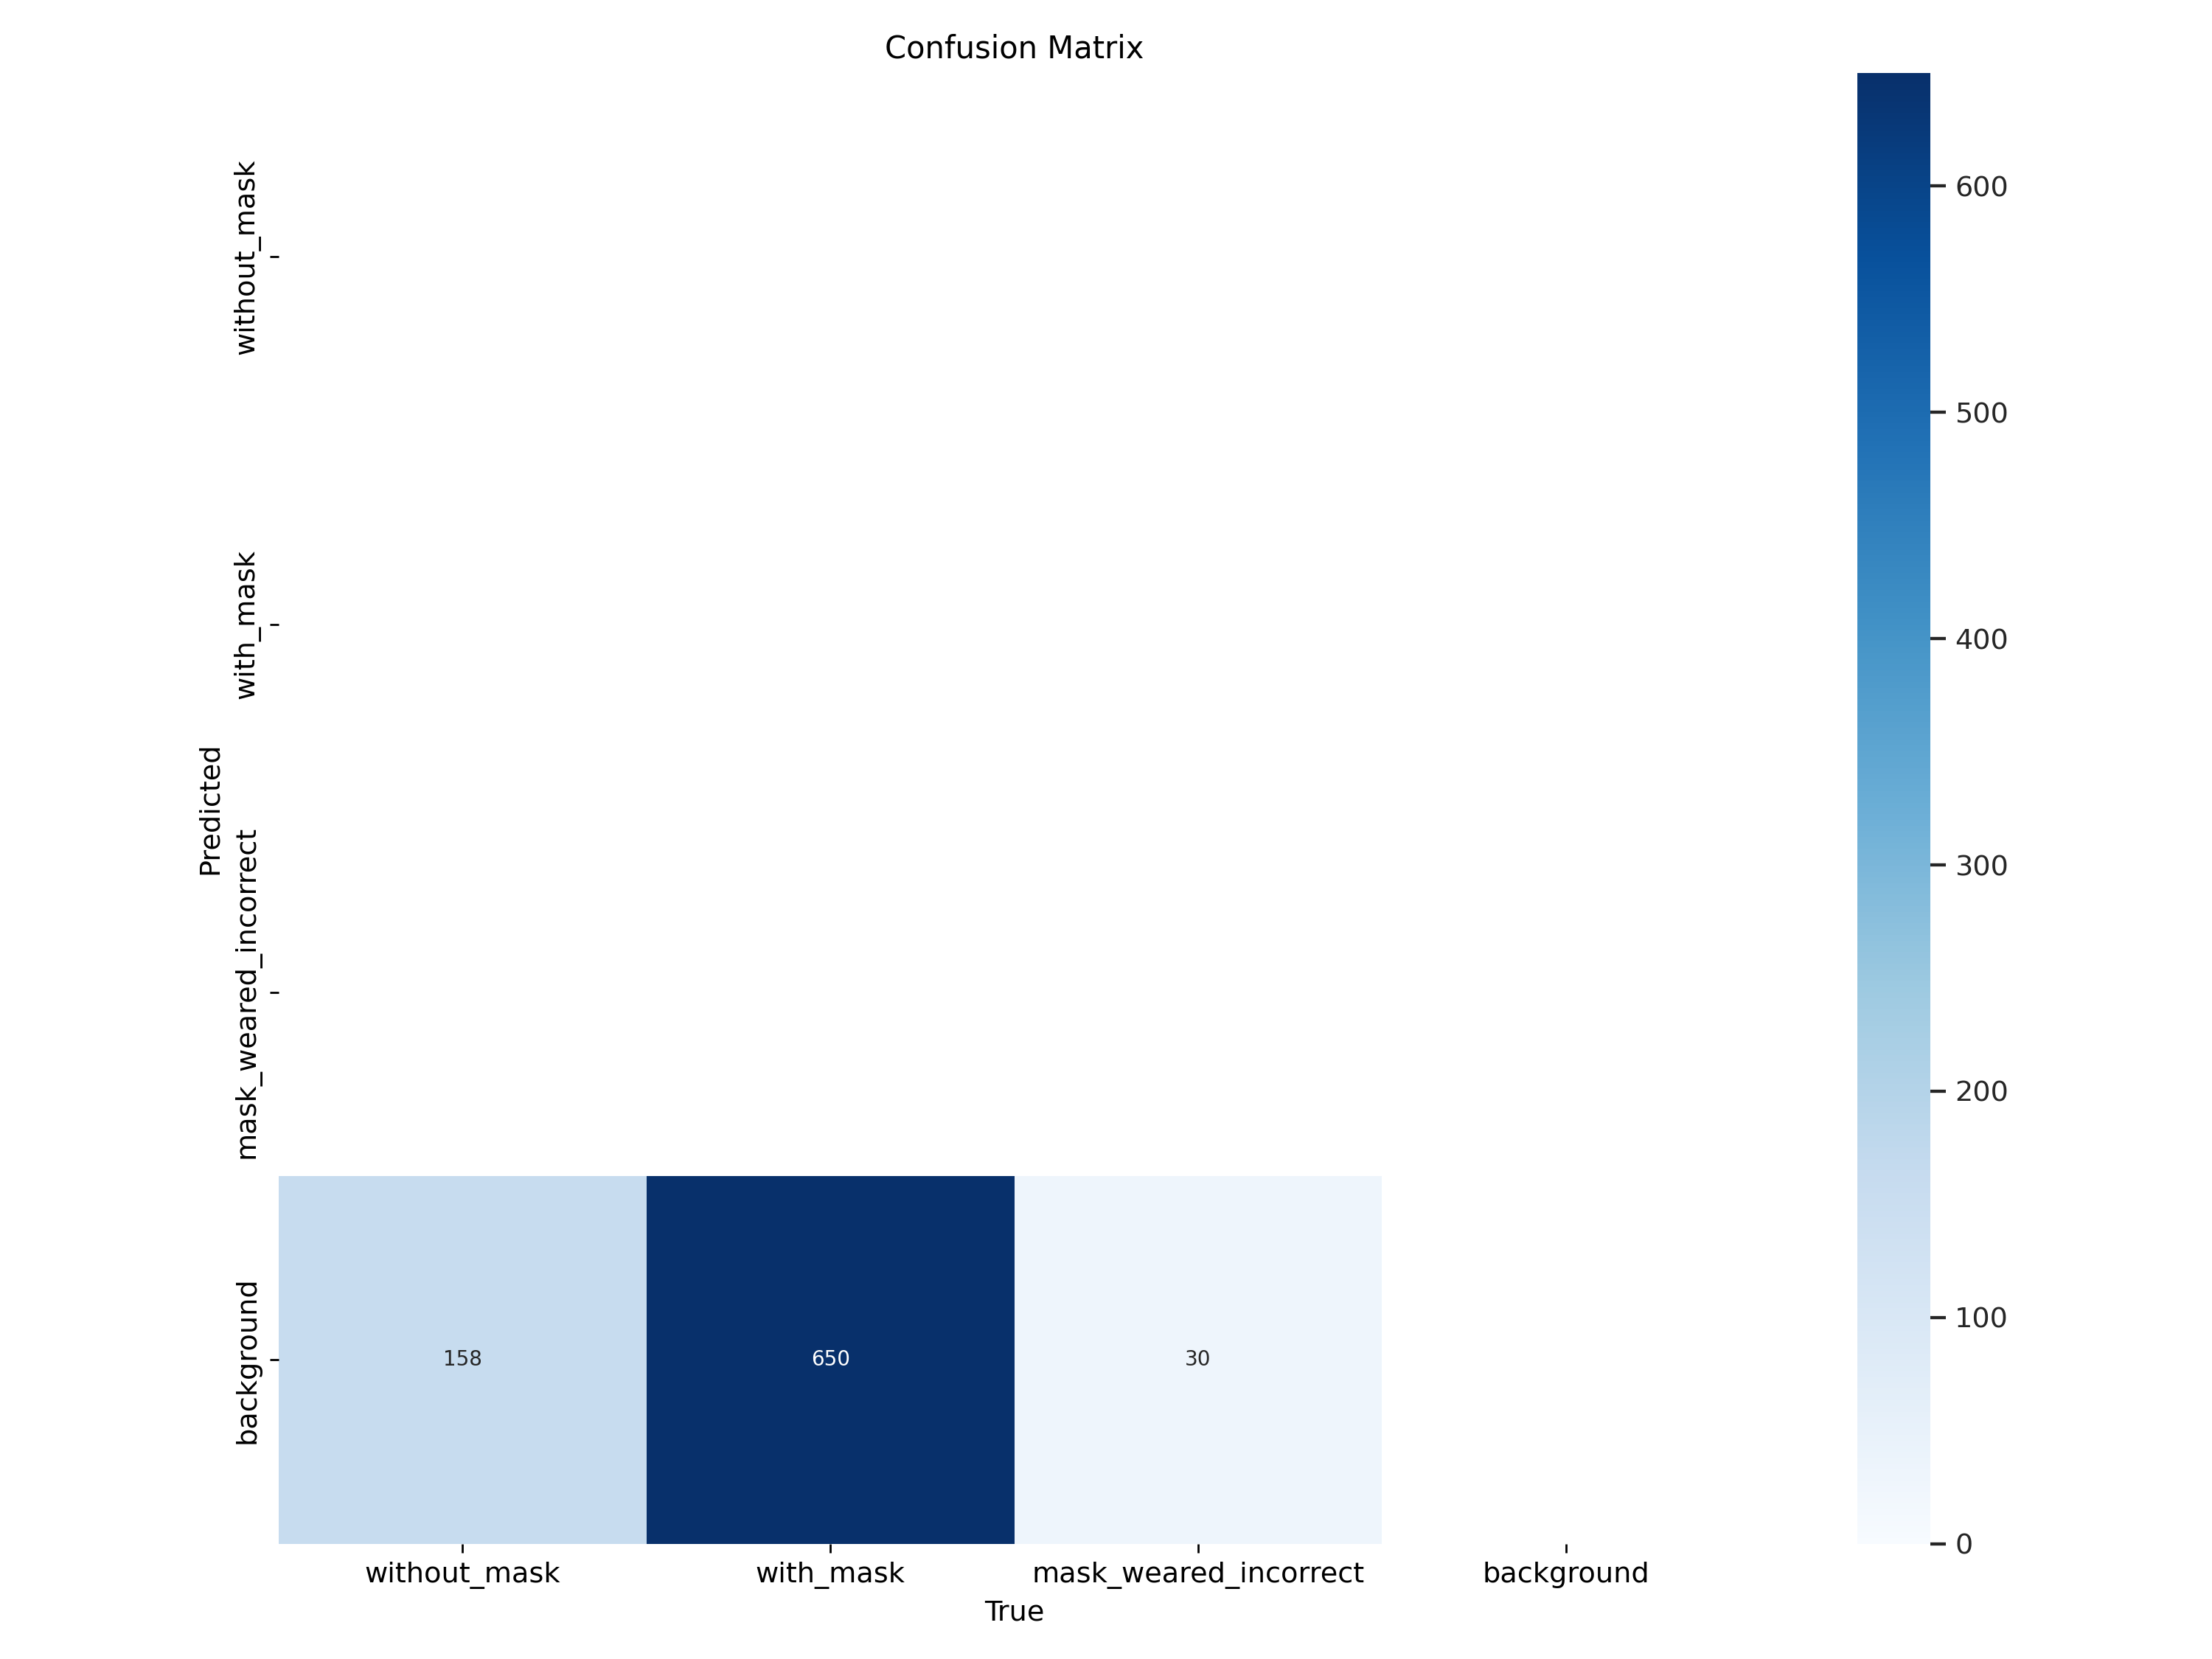

In [83]:
Image(filename=f'{run_path}/confusion_matrix.png', width=600)

#### Confusion Matix Normalized

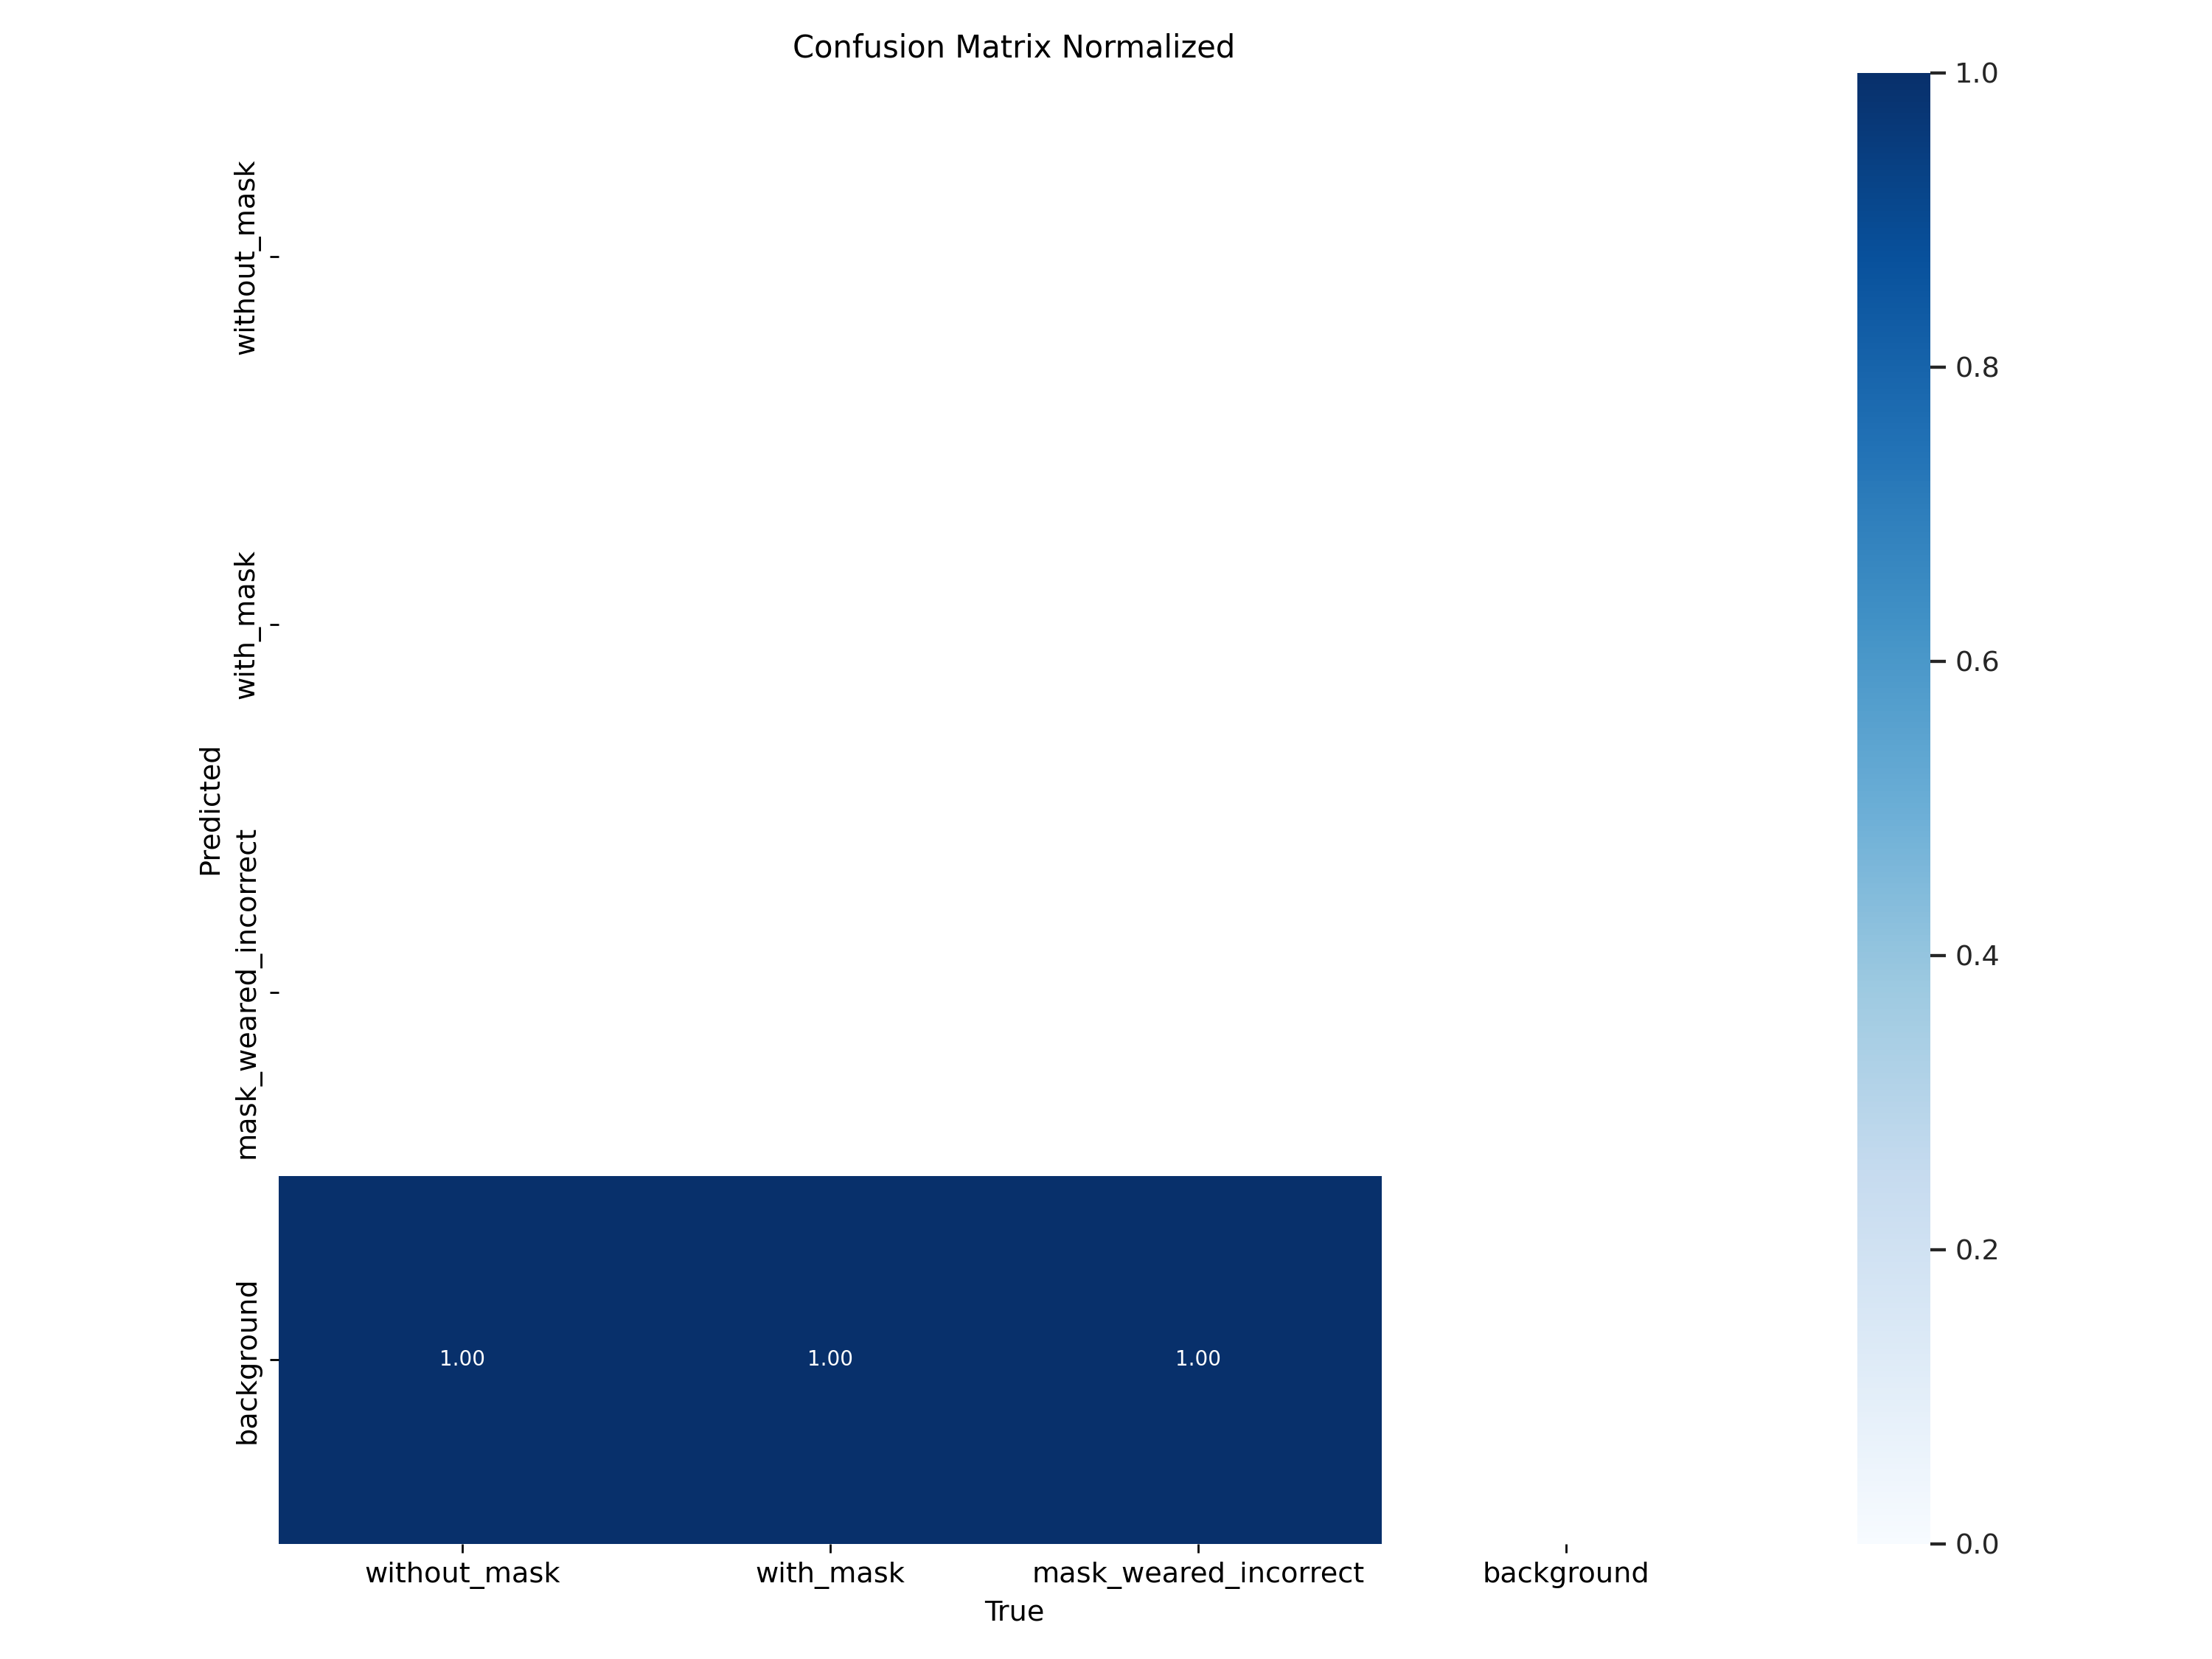

In [88]:
Image(filename=f'{run_path}/confusion_matrix_normalized.png', width=600)

#### P-Curve

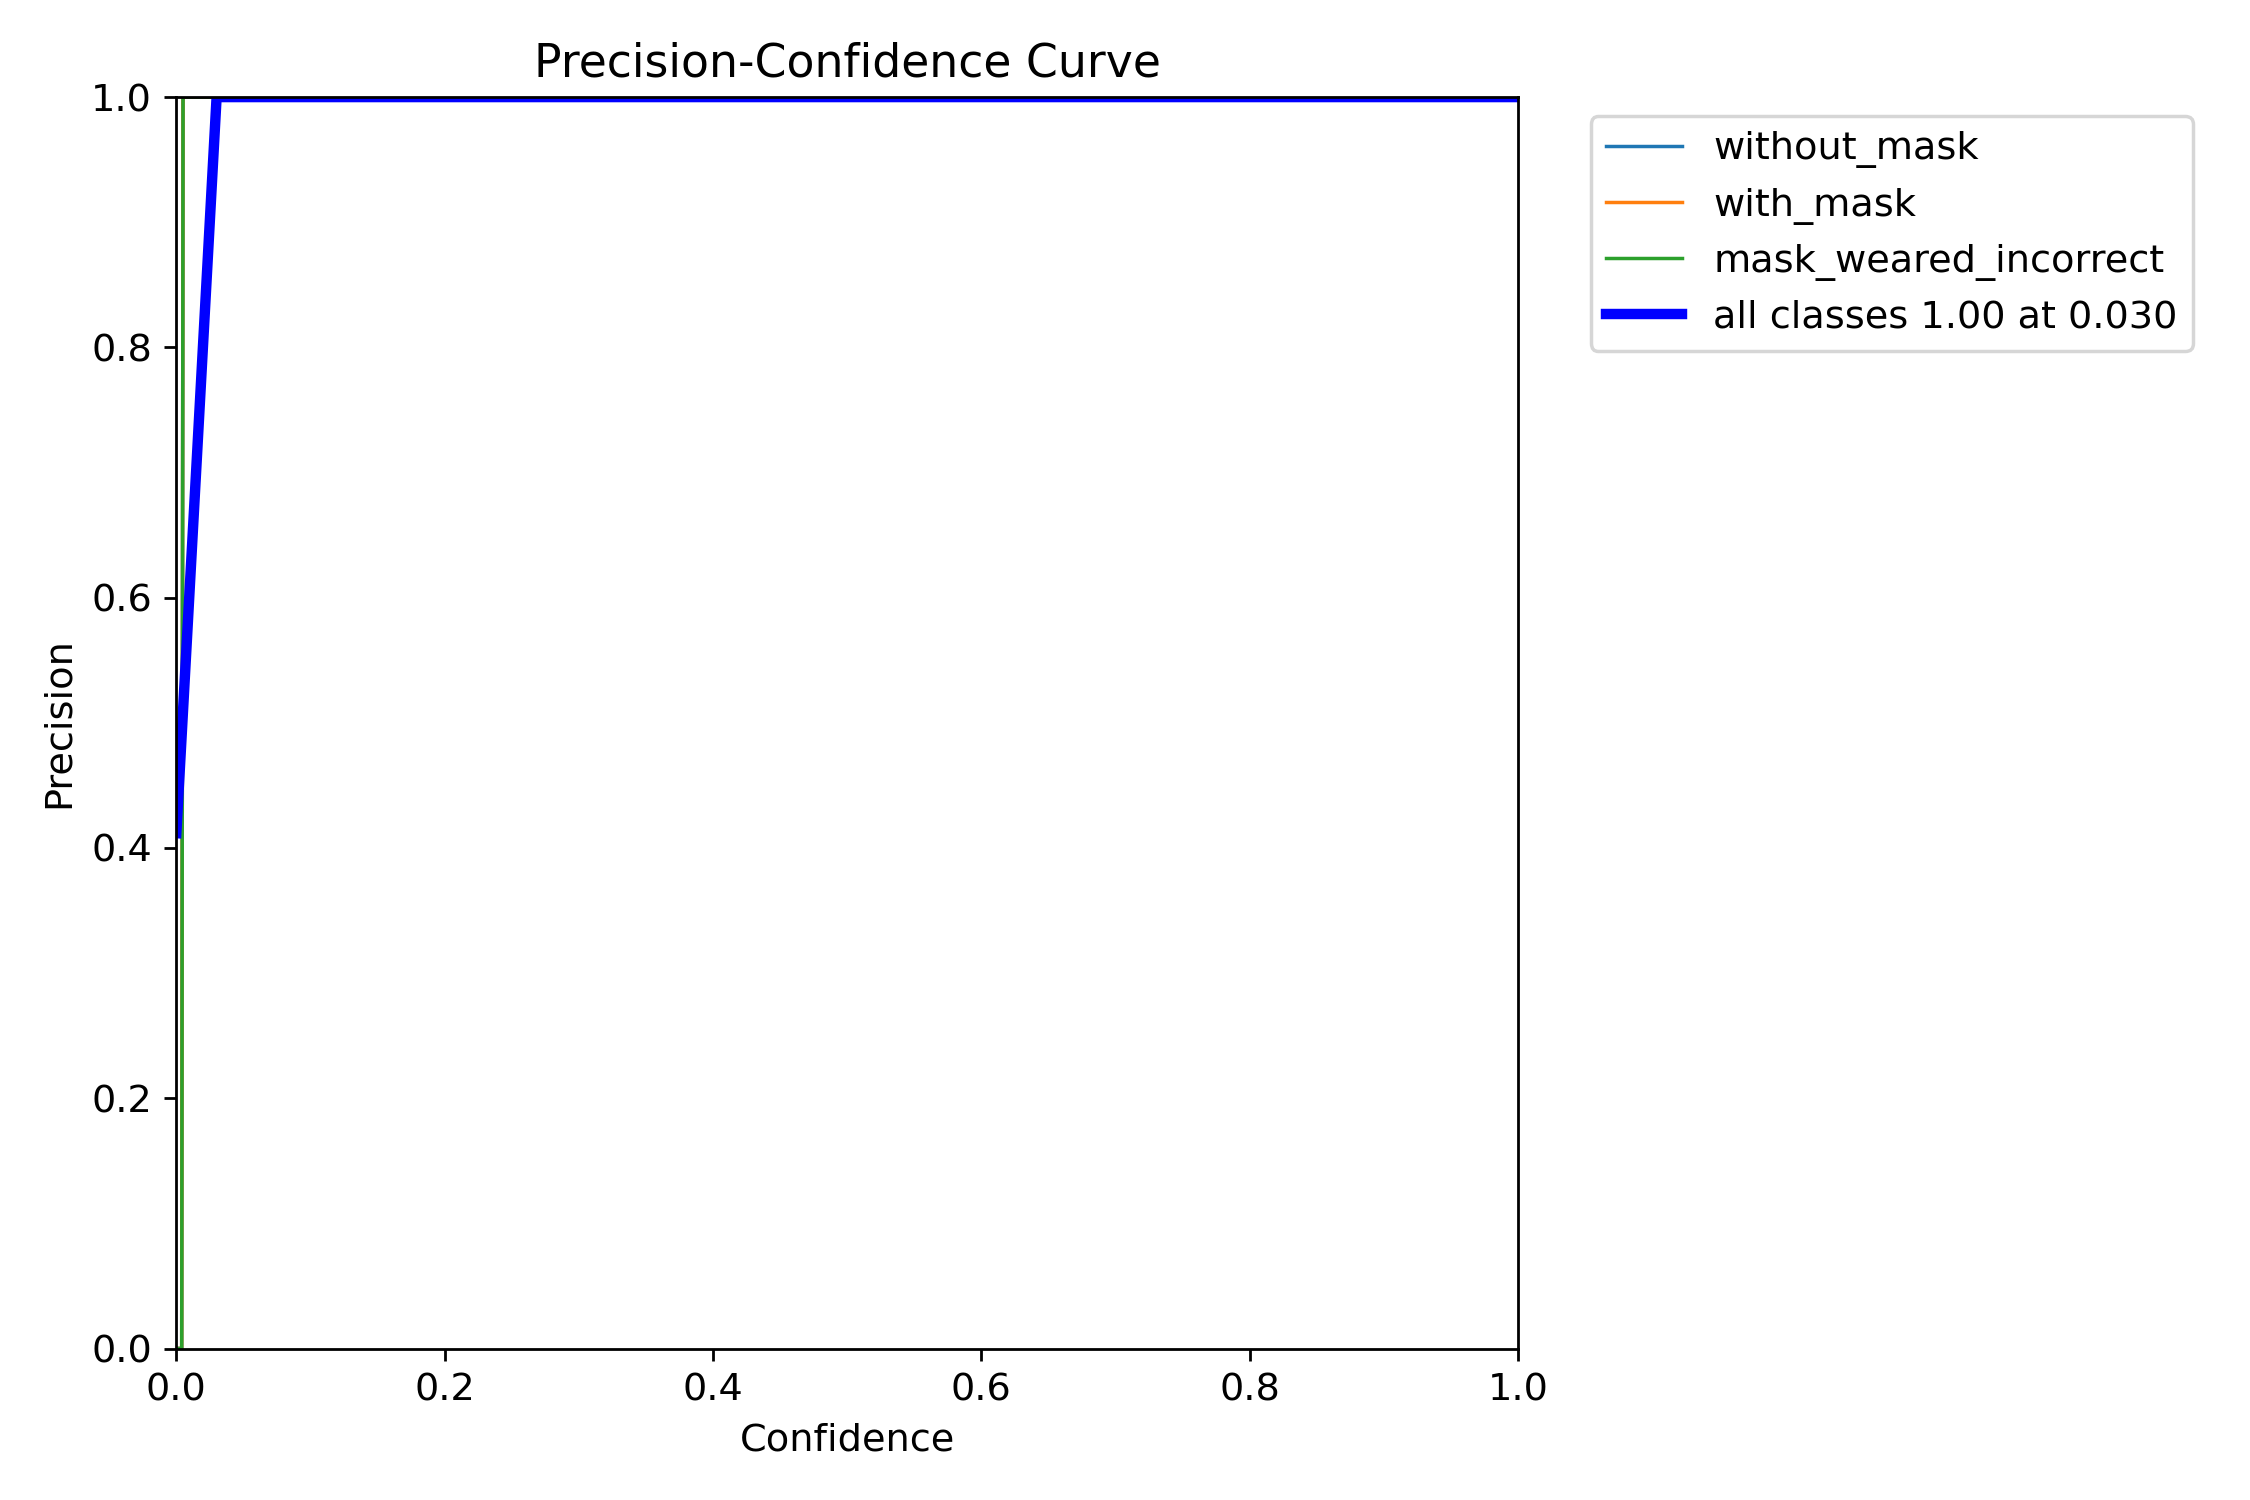

In [84]:
Image(filename=f'{run_path}/P_curve.png', width=600)

#### R-Curve

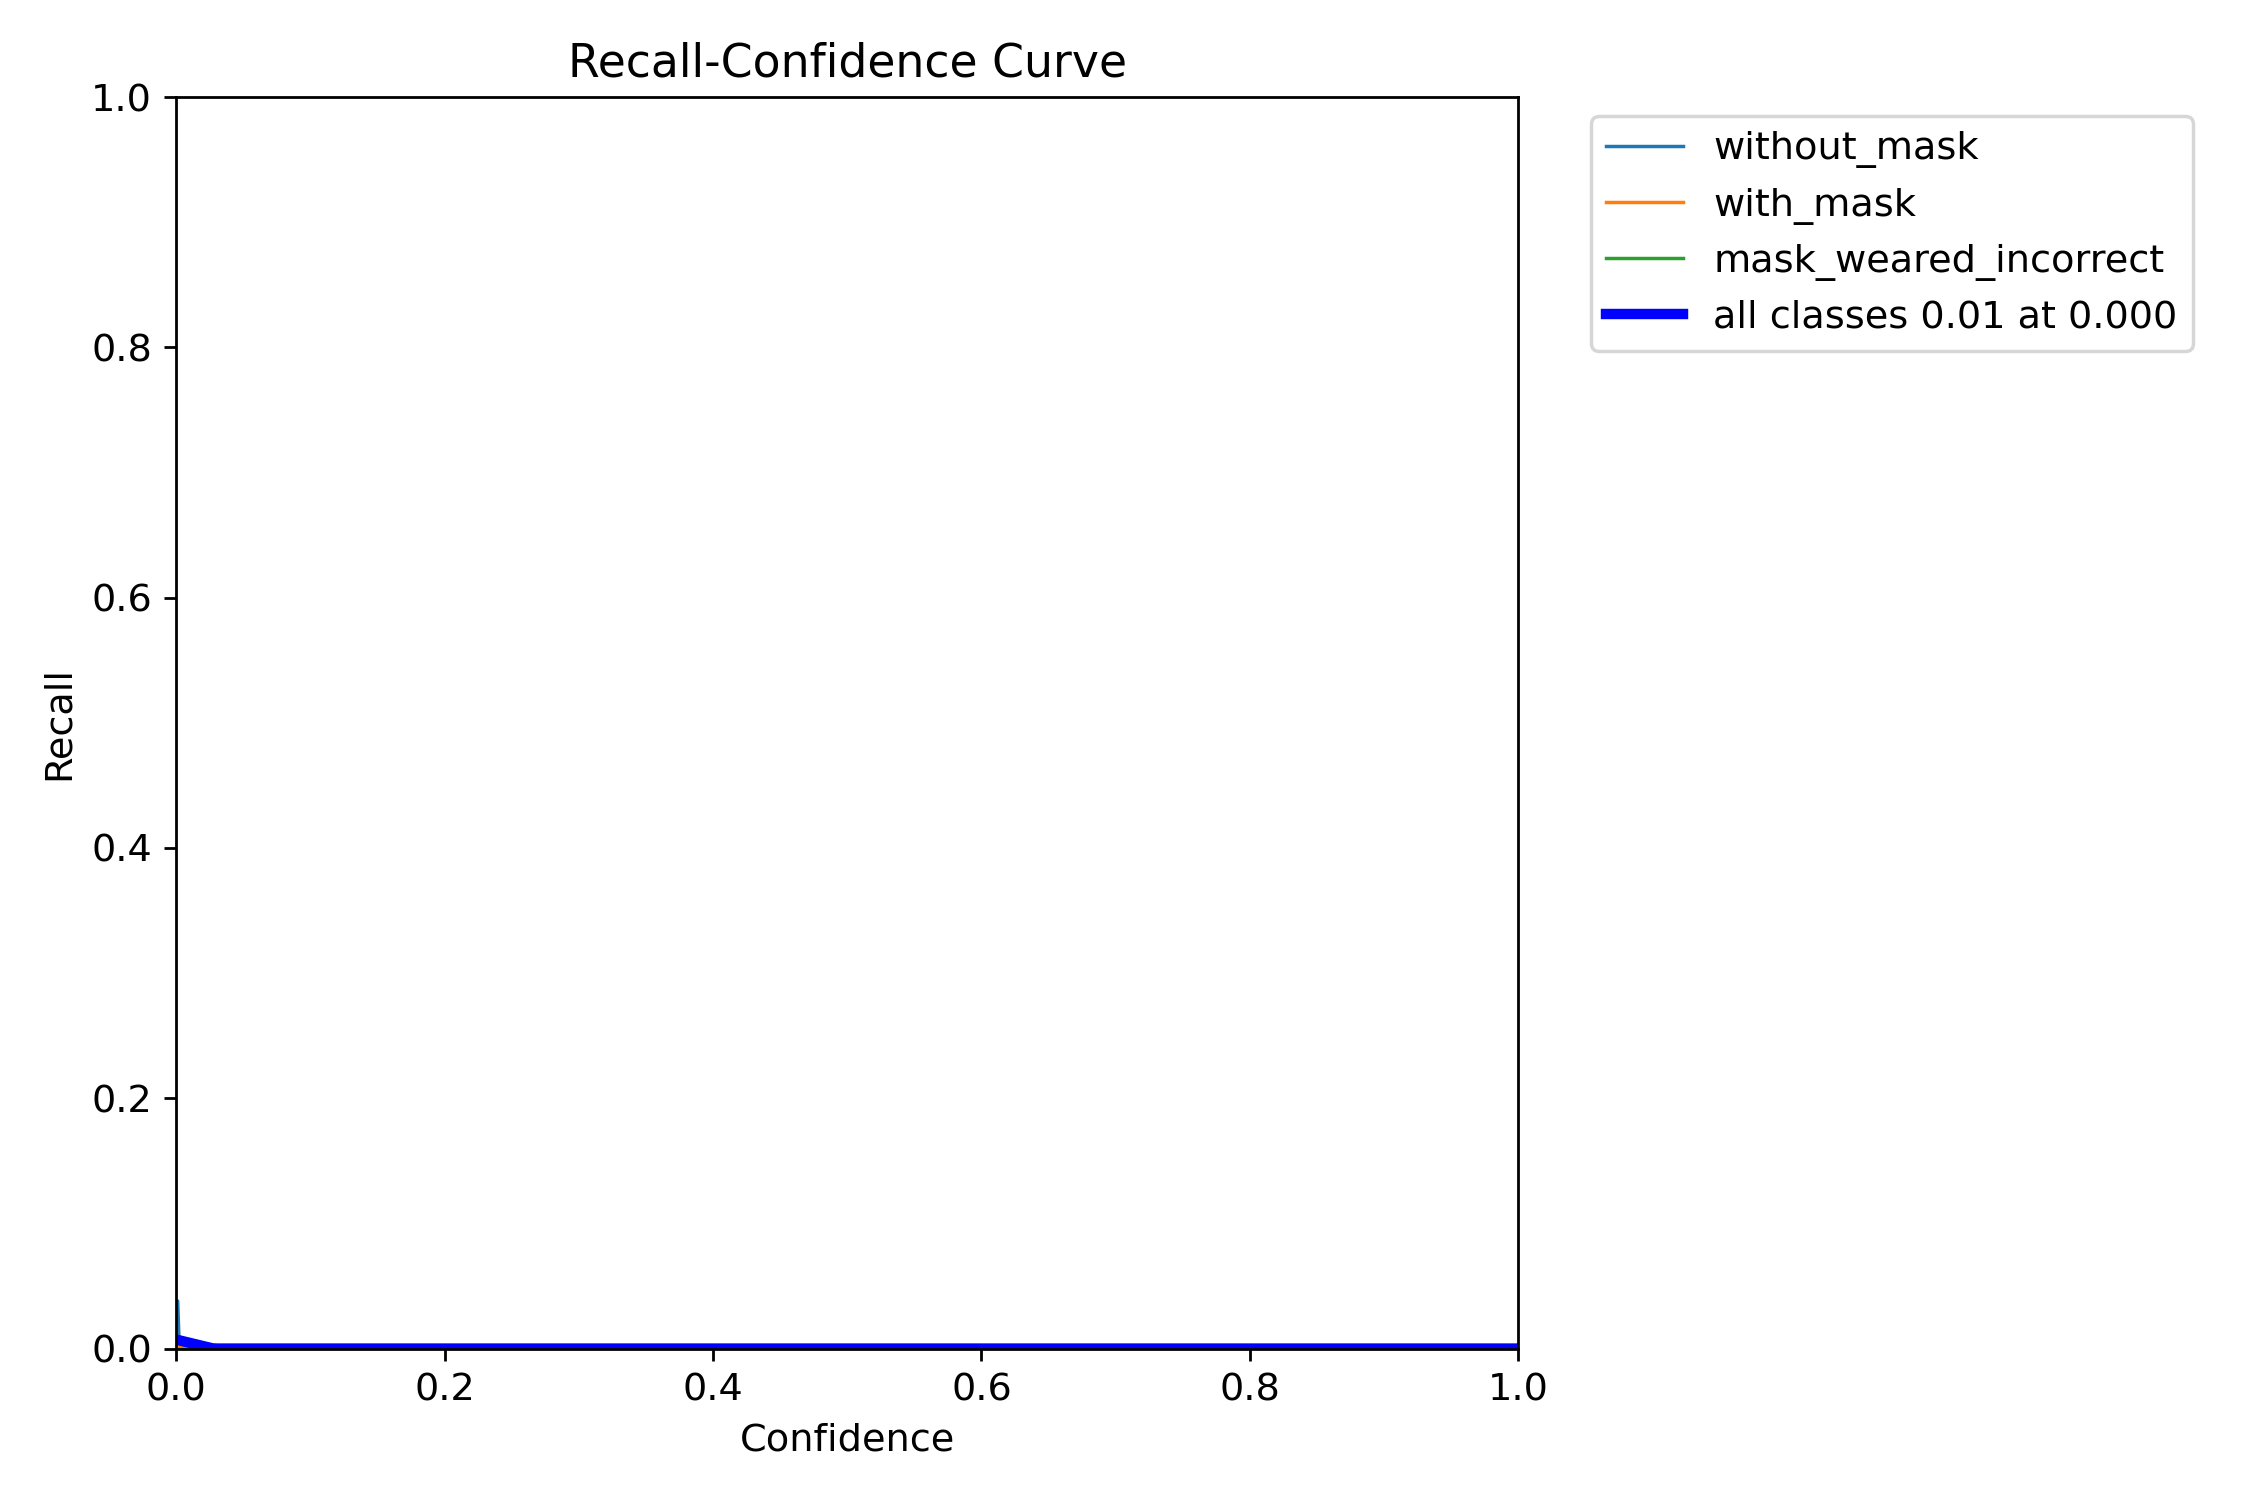

In [87]:
Image(filename=f'{run_path}/R_curve.png', width=600)

#### Results

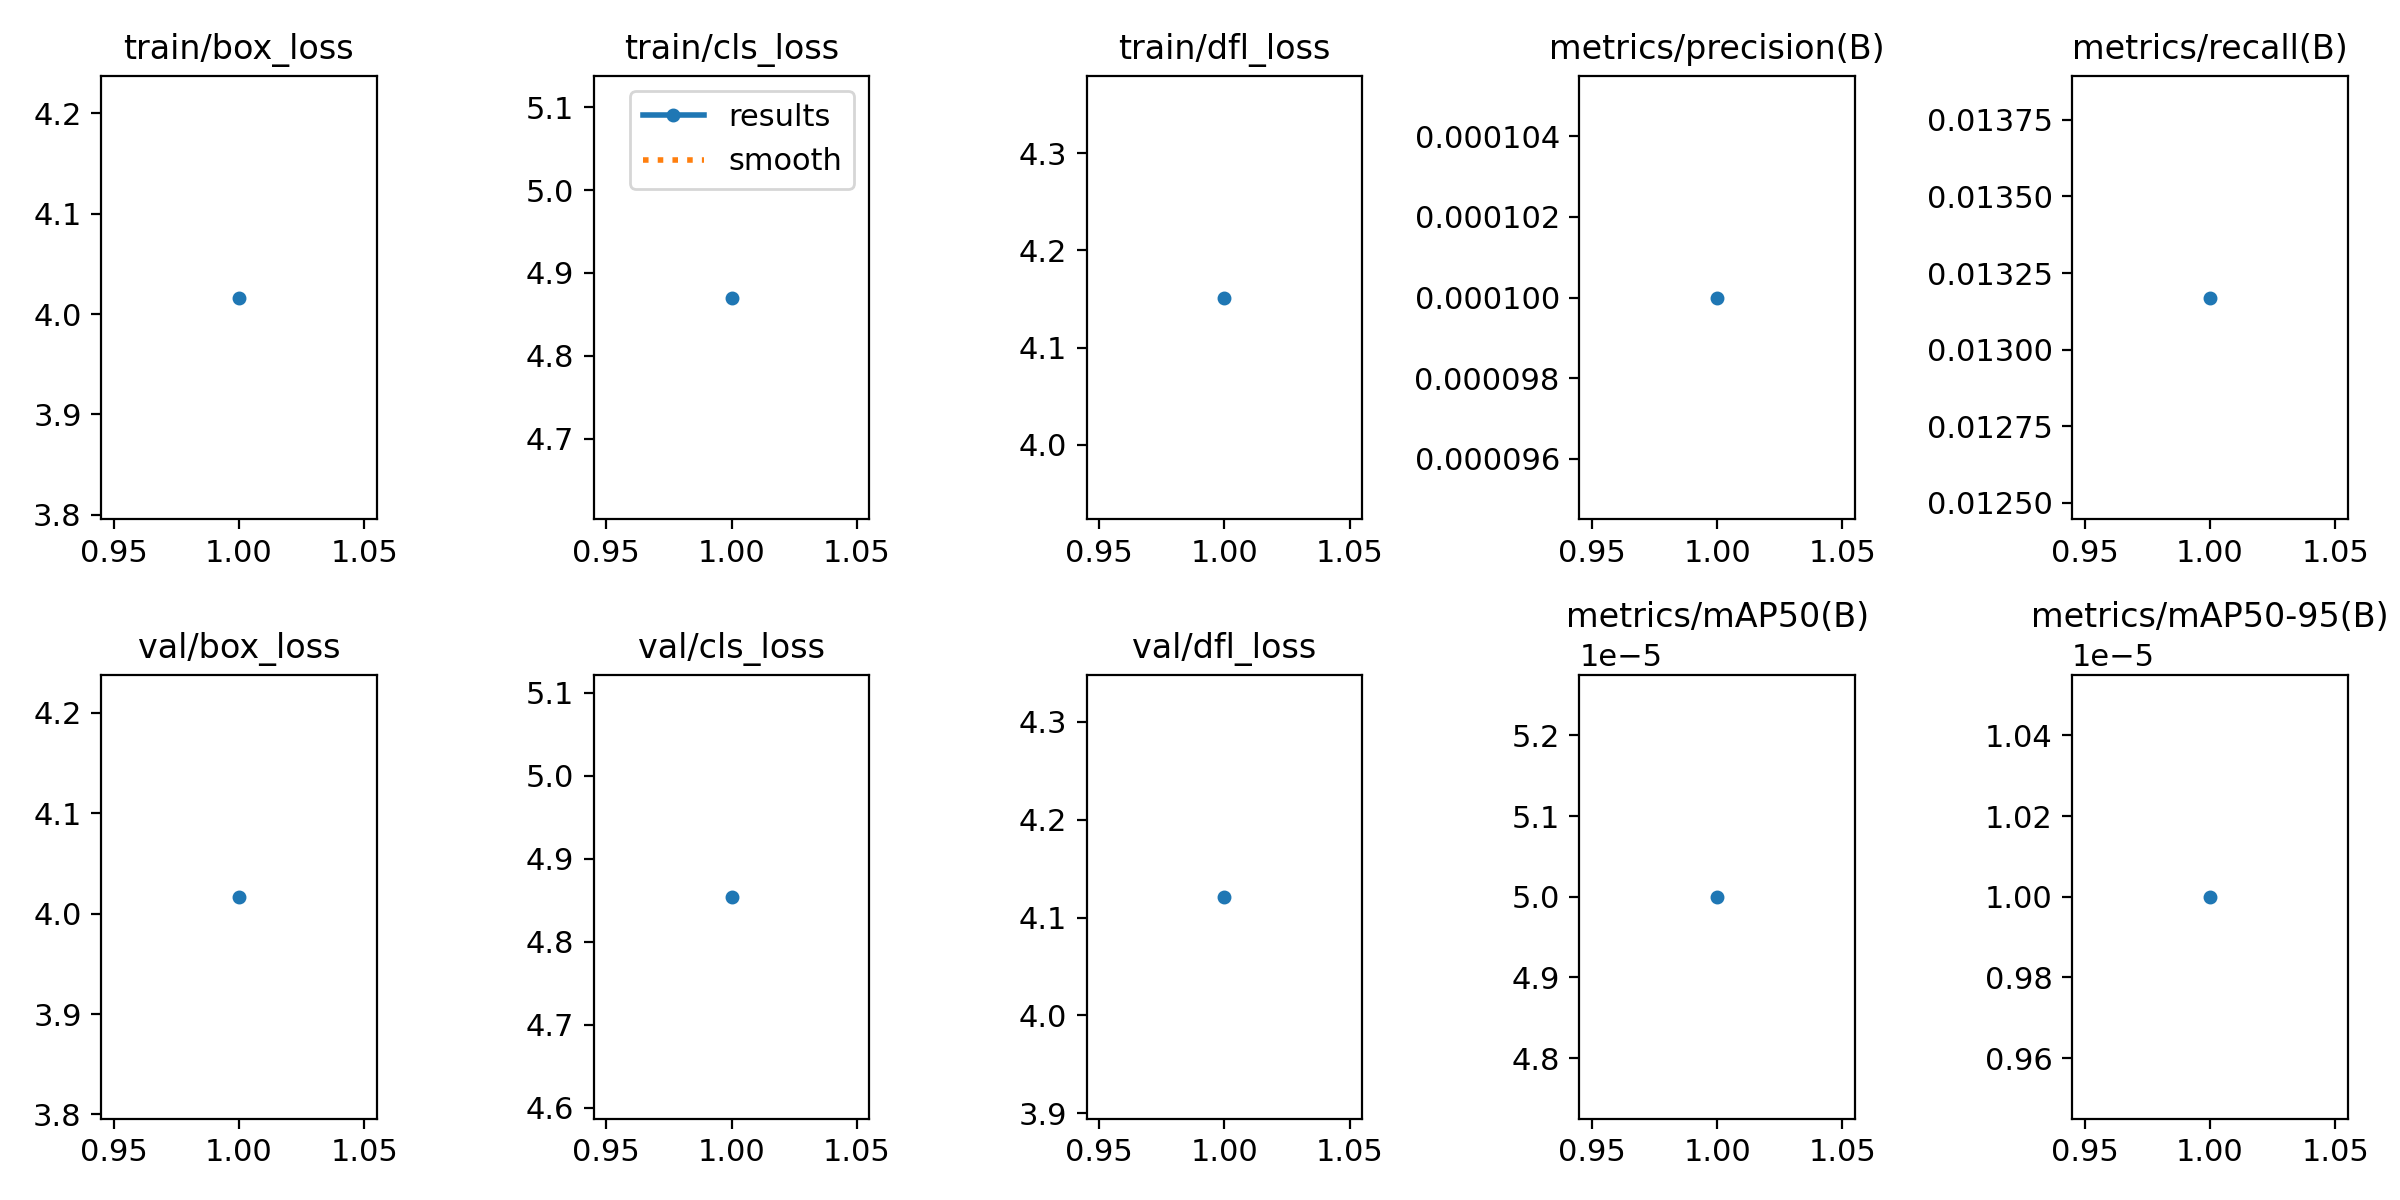

In [85]:
Image(filename=f'{run_path}/results.png', width=600)

#### Prediction Visual Validation

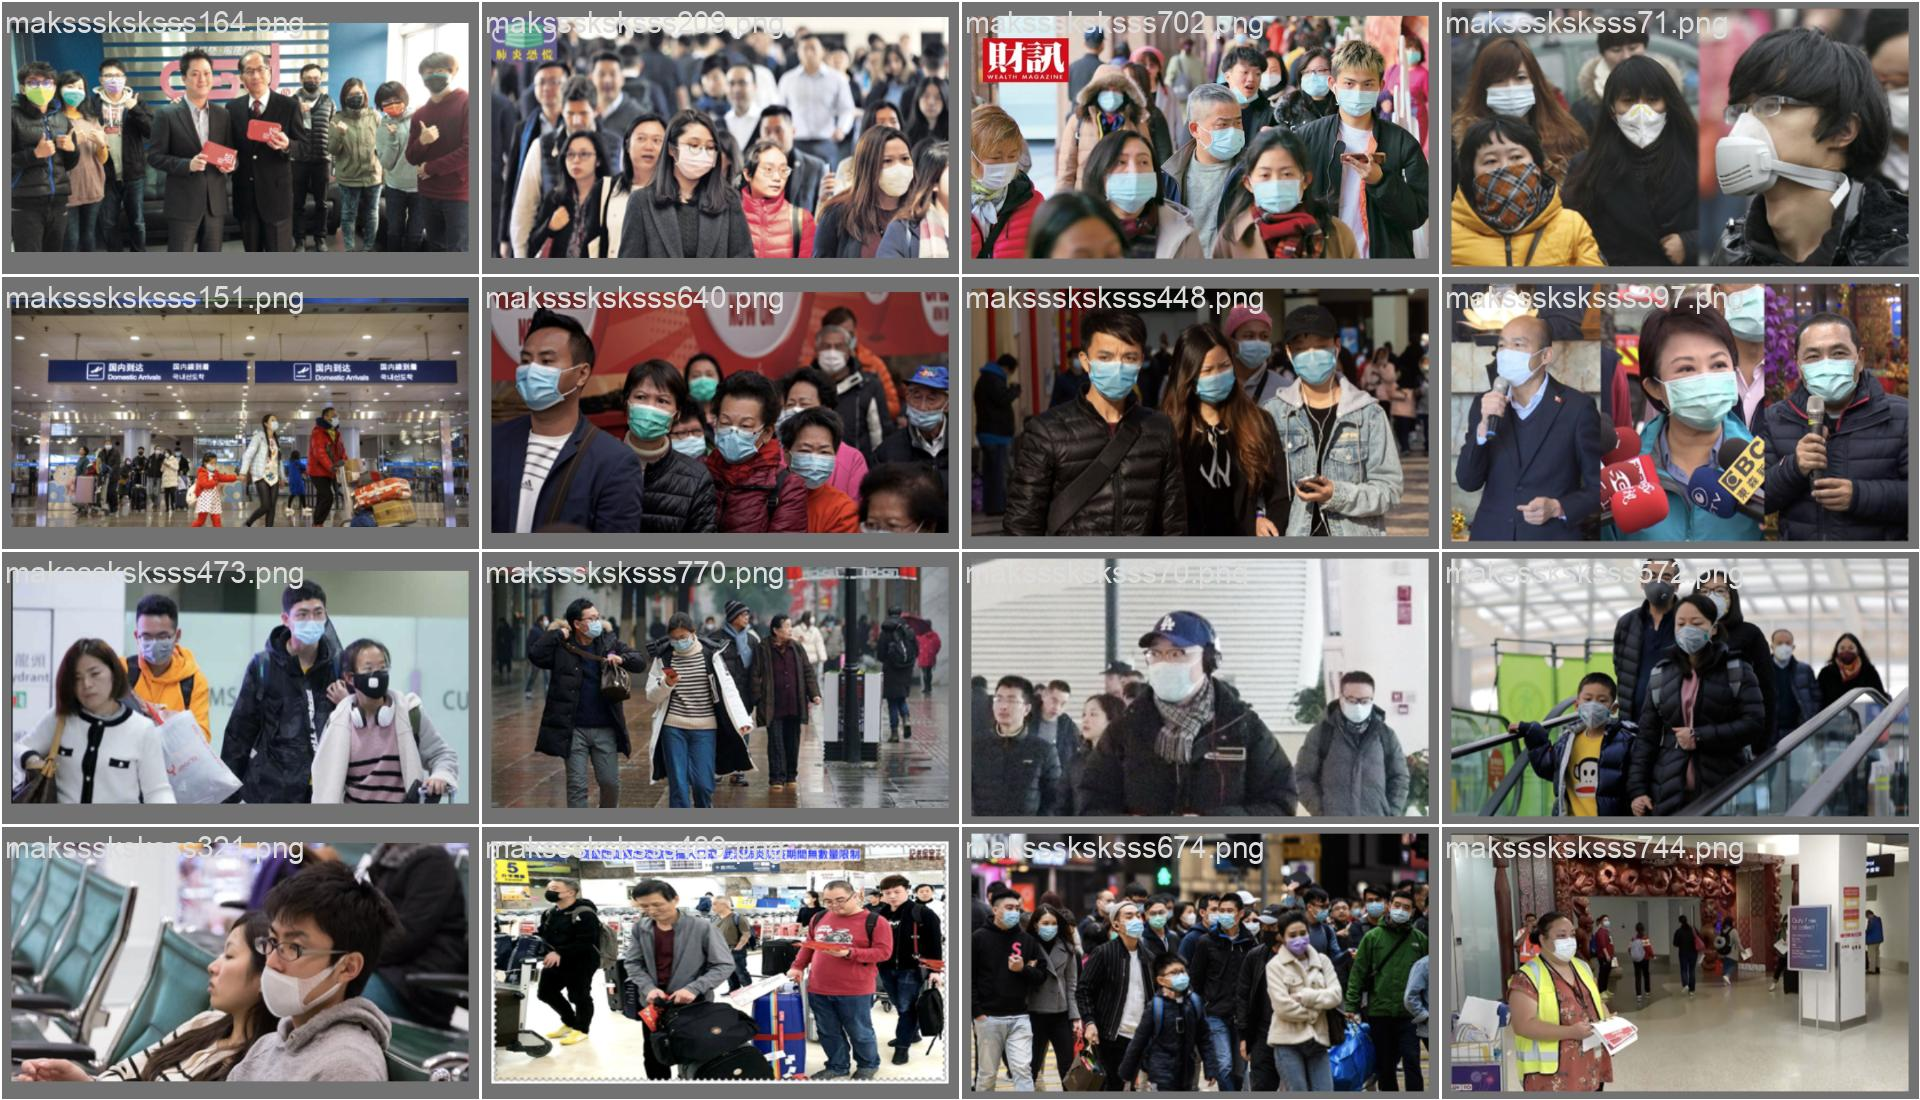

In [86]:
Image(filename=f'{run_path}/val_batch0_pred.jpg', width=600)

#### Data Overview

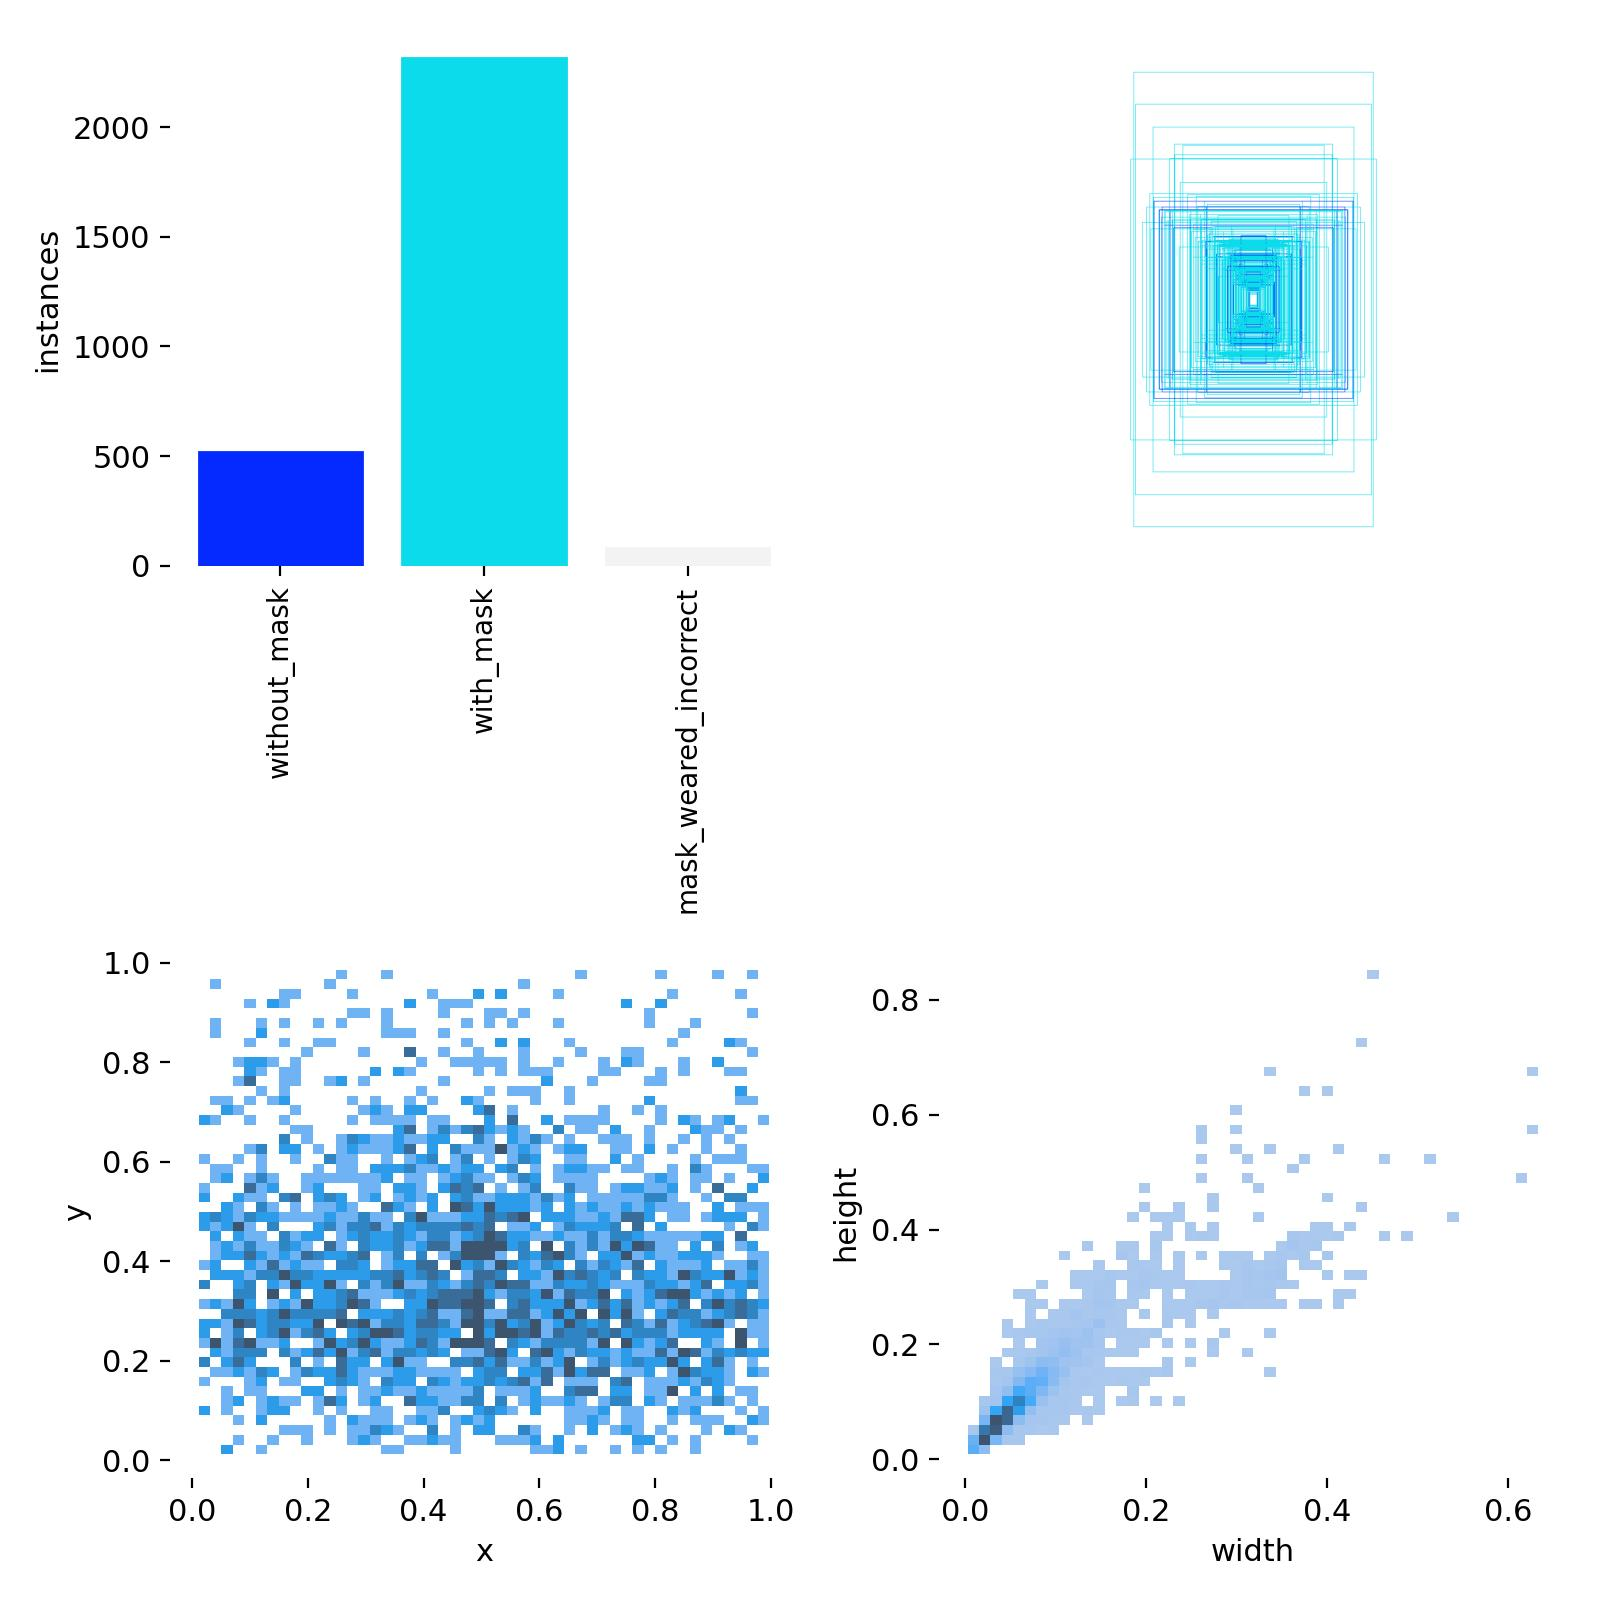

In [90]:
Image(filename=f'{run_path}/labels.jpg', width=600)

## Model (Fine-Tuned) Validation

### Load and Validate Trained model

In [128]:
# Load trained YOLO 11
!yolo task=detect mode=val \
      model={run_path}/weights/best.pt \
      data=data_config.yaml \
      project={run_path}

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11 summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/drive/MyDrive/projects/Face-Mask-Detection/data/val/labels.cache... 170 images, 0 backgrounds, 0 corrupt: 100% 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:49<00:00,  4.53s/it]
                   all        170        838   0.000102     0.0132   5.26e-05   1.49e-05
          without_mask         63        158   0.000191      0.038   0.000101   3.32e-05
             with_mask        157        650   0.000113    0.00154   5.72e-05   1.14e-05
 mask_weared_incorrect         24         30          0          0          0          0
Speed: 6.0ms preprocess, 237.0ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to runs/detect/train_yolo11_epoch1_v1/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Display Some Samples

In [131]:
latest_folder = max(glob.glob(os.path.join(run_path, "val")), key=os.path.getmtime)
print(f"Latest folder created: {latest_folder}")
for img in glob.glob(f'{latest_folder}/*.jpg')[0:4]:
  display(Image(filename=img, width=600))
  print("\n")

Output hidden; open in https://colab.research.google.com to view.

## Export Model Weights

In [ ]:
shutil.copy(os.path.join(run_path, "weights/best.pt"), "../models/yolo11")

## Model (Fine-Tuned) Test

In [136]:
# Load trained YOLO 11
!yolo task=detect mode=predict \
      model={run_path}/weights/best.pt \
      source=test/images \
      data=data_config.yaml \
      project={run_path}

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11 summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss103.png: 480x640 (no detections), 183.1ms
image 2/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss120.png: 640x512 (no detections), 208.1ms
image 3/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss122.png: 448x640 (no detections), 174.6ms
image 4/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss125.png: 640x512 (no detections), 184.6ms
image 5/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss127.png: 640x448 (no detections), 193.0ms
image 6/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss138.png: 448x640 (no detections), 153.5ms
image 7/86 /content/drive/MyDrive/

## Export Code Repository to GitHub

In [2]:
!ls

drive  runs


In [94]:
# Change directory
os.chdir('/content/drive/MyDrive/projects/Face-Mask-Detection')

In [40]:
!ls

data  model_training  README.md  report


In [41]:
# !du -h data/runs | sort -h

11M	data/runs/detect/train/weights
16M	data/runs
16M	data/runs/detect
16M	data/runs/detect/train


In [96]:
# !git reset --soft HEAD~1

In [100]:
# Add, commit, and push
!git init
!git status
!git add *
!git commit -m "YOLO 11"
!git pull origin main
!git push origin main


Reinitialized existing Git repository in /content/drive/MyDrive/projects/Face-Mask-Detection/.git/
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .gitignore

no changes added to commit (use "git add" and/or "git commit -a")
The following paths are ignored by one of your .gitignore files:
data
hint: Use -f if you really want to add them.
hint: Turn this message off by running
hint: "git config advice.addIgnoredFile false"
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .gitignore

no changes added to commit (use "git add" and/or "git commit -a")
From https://github.com/gabriel-ferreira-life/Face-Mask-Detection
